In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
!cd

d:\360Digitmg\Project\End-to-End-Student-exam-performance-predictor\notebook\data


In [32]:
#Import csv
df = pd.read_csv('StudentsPerformance.csv')

Dataset Info
- Gender: sex of students -> (Male/Female)
- race/ethnicity : ethnicity of students -> (Group A,B,C,D,E)
- parental level of education : parents' final education -> (bachelor's degree, some college, master's degree. associate's degree, high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test 
- math score
- reading score
- writing score


In [33]:
for i in range(len(df.columns)):
    df.columns.values[i] = df.columns[i].replace(" ","_")


In [21]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data checks

- Missing values 
- Duplicates 
- Check datatyoe
- no of unique values of each column 
- check statistic sof dataset
- Check various categories present in the different categorical column


In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No missing values in the dataset

In [10]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [22]:
col = ['math_score', 'reading_score',
       'writing_score']

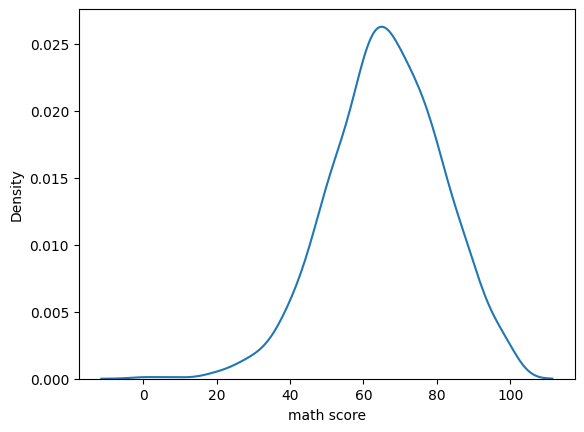

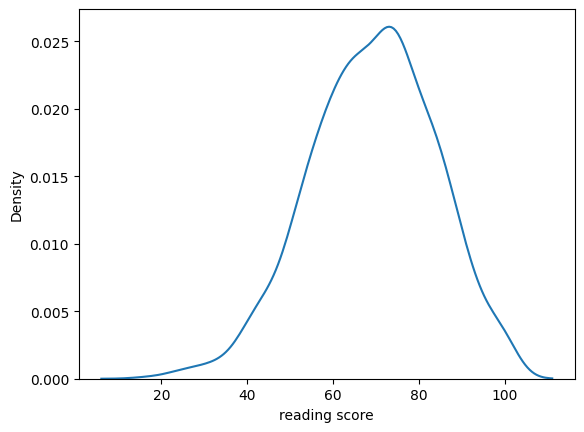

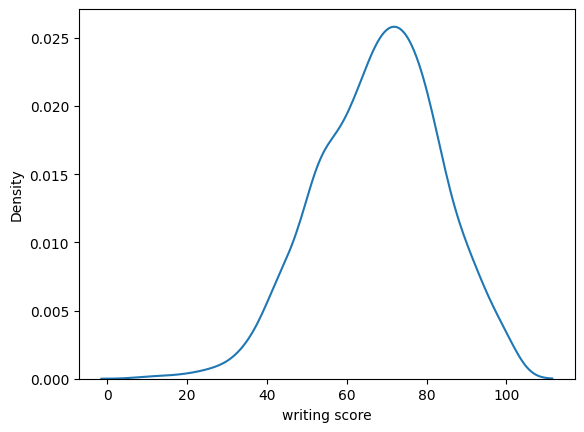

In [23]:
for cols in col:
    sns.kdeplot(x = df[cols])
    plt.show()

- The graph is almost symmetrical with means closer
- std deviation is almost same for all


In [24]:
cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']

In [25]:
for i in cols:
    print(f"""
            Categories in {i} variable: {df[i].unique()}
                    """)


            Categories in gender variable: ['female' 'male']
                    

            Categories in race/ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
                    

            Categories in parental level of education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
                    

            Categories in lunch variable: ['standard' 'free/reduced']
                    

            Categories in test preparation course variable: ['none' 'completed']
                    


## Adding columns for Total score and average score

In [35]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [34]:
df['math_score']

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

### Adding columns for "Total Score" and "Average

In [39]:
df['Total_Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total_Score'] / 3
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [49]:
reading_full = df[df['reading_score'] == 100]['Average'].count()
writing_full = df[df['writing_score'] == 100]['Average'].count()
math_full = df[df['math_score'] == 100]['Average'].count()

In [52]:
print(f'Stundets who got full marks in reading : {reading_full} ')
print(f'Stundets who got full marks in writing : {writing_full} ')
print(f'Stundets who got full marks in maths : {math_full} ')

Stundets who got full marks in reading : 17 
Stundets who got full marks in writing : 14 
Stundets who got full marks in maths : 7 


In [55]:
reading_less_20 = df[df['reading_score'] < 20]['Average'].count()
writing_less_20 = df[df['writing_score'] < 20]['Average'].count()
math_less_20 = df[df['math_score'] < 20]['Average'].count()

In [56]:
print(f'Stundets who got less marks in reading : {reading_less_20} ')
print(f'Stundets who got less marks in writing : {writing_less_20} ')
print(f'Stundets who got less marks in maths : {math_less_20} ')

Stundets who got less marks in reading : 1 
Stundets who got less marks in writing : 3 
Stundets who got less marks in maths : 4 


### Hist and KDE

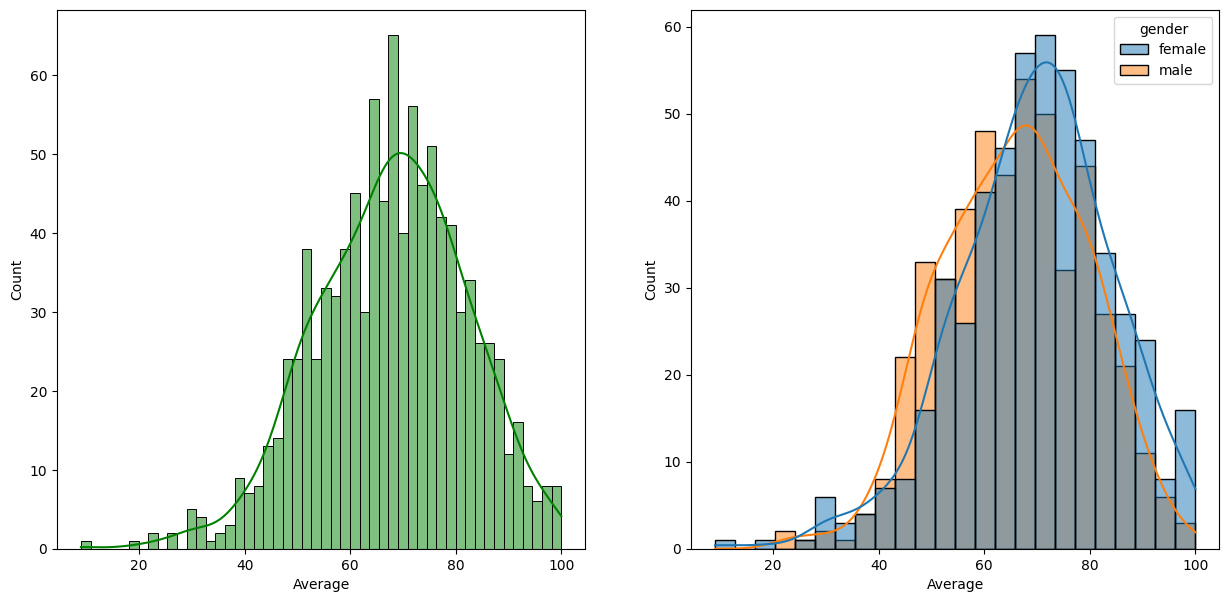

In [60]:
fig, axis = plt.subplots(1, 2 , figsize = (15,7))
plt.subplot(121)
sns.histplot( data = df, x= 'Average', bins = 50, kde = True, color ='g')
plt.subplot(122)
sns.histplot(data = df, x= 'Average', kde = True, hue = 'gender')
plt.show()

Female students tend to score more than male when the average is considered

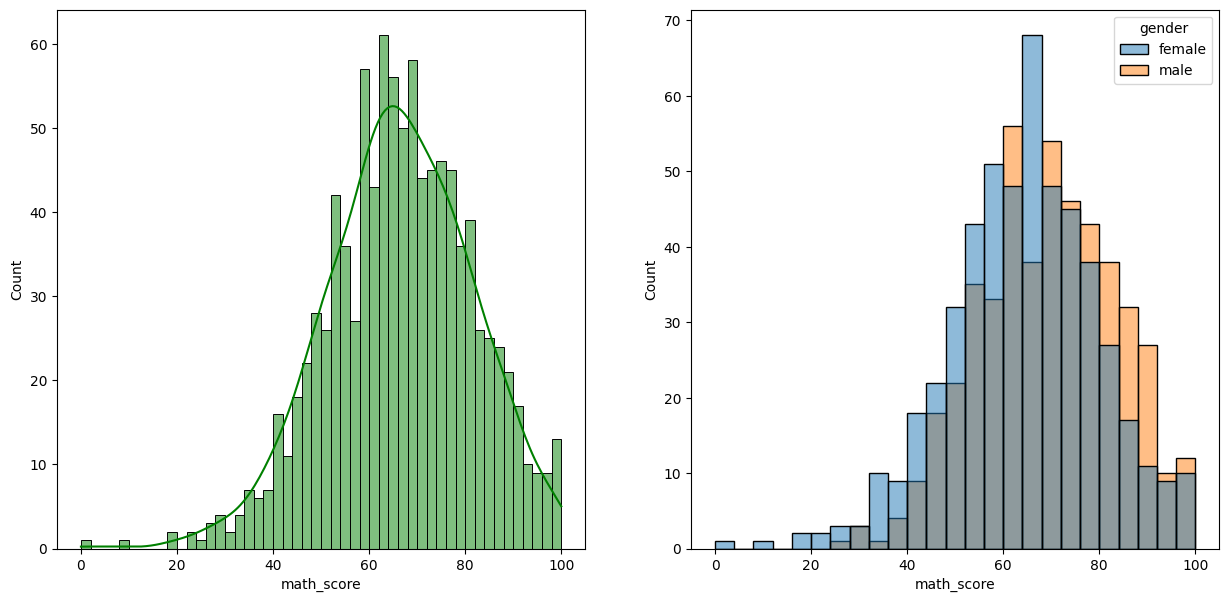

In [59]:
fig, axis = plt.subplots(1, 2 , figsize = (15,7))
plt.subplot(121)
sns.histplot( data = df, x= 'math_score', bins = 50, kde = True, color ='g')
plt.subplot(122)
sns.histplot(data = df, x= 'math_score', hue = 'gender')
plt.show()

But when you consider only math, Female students have outperformed boys in the average range.
But in the higher marks range, Male students have outperformed female students.